In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

## Linear regression with one variable

You will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [2]:
data = pd.read_csv('data/ex1data1.txt', 
                   header=None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting the Data

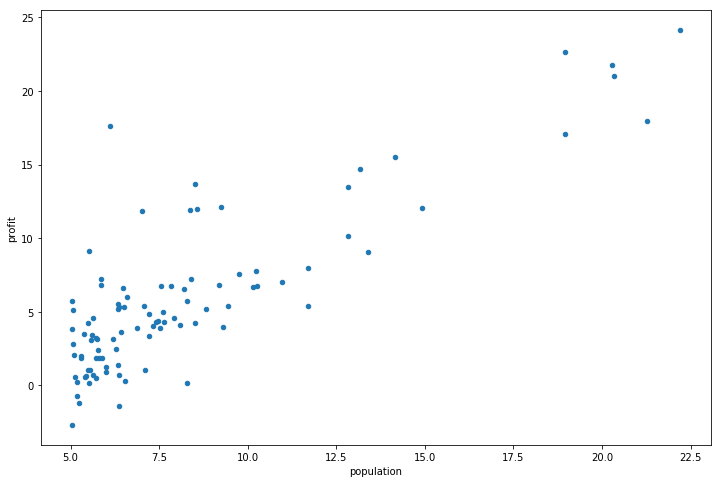

In [3]:
data.plot(kind='scatter', x='population', y='profit', figsize=(12,8));

### Gradient Descent

The objective of linear regression is to minimize the cost function;

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model;

$h_\theta(x) = \theta^Tx=\theta_0+\theta_1x_1$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. 

In batch gradient descent, each iteration performs the update;

$$\theta_j :=  \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$$

simultaneously update $\theta_j$ for all $j$.

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

### Implementation

In the following lines, we add another dimension to our data to accommodate the
$\theta_0$ intercept term.

We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [4]:
data.insert(0, 'intercept', 1)

In [5]:
theta = np.array([[0],
                  [0]])

iterations = 1500
alpha = 0.01

In [6]:
X = data.as_matrix(['intercept', 'population'])
y = data.as_matrix(['profit'])

### Computing the cost $J(\theta)$

In [7]:
def computeCost(X, y, theta):
    inside = np.power((X.dot(theta) - y), 2)
    return np.sum(inside) / (2 * len(X))

In [8]:
computeCost(X, y, theta)

32.072733877455676

### Gradient descent

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector$\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$.

A good way to verify that gradient descent is working correctly is to look
at the value of $J(\theta)$ and check that it is decreasing with each step.

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    cost = []
    
    for i in range(iterations):
        error = X.dot(theta) - y
        gradient = X.T.dot(error)
        theta = theta - (alpha/len(y)) * gradient
        
        cost.append(computeCost(X, y, theta))
    
    return theta, cost

In [10]:
theta, cost = gradientDescent(X, y, theta, alpha, iterations)

In [11]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [12]:
computeCost(X, y, theta)

4.483388256587726

### Figure 2: Training data with linear regression fit

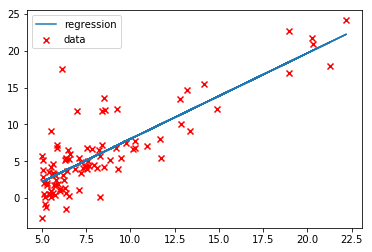

In [13]:
plt.scatter(X[:,1], y, marker='x', c='red', label='data')
pred_y = X.dot(theta)
plt.plot(X[:, 1], pred_y, label = 'regression')
plt.legend();

### Visualizing $J(\theta)$

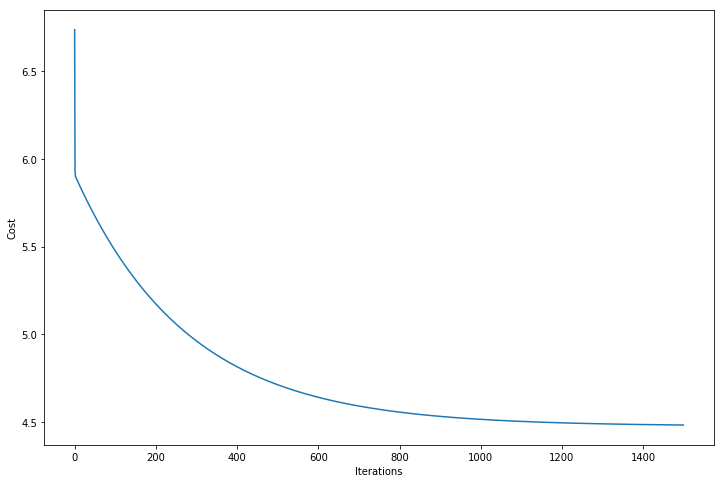

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost');

## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [15]:
data2 = pd.read_csv('data/ex1data2.txt',
                    header=None, names=['size', 'bedrooms', 'price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Normalization

Your task here is to complete the code in featureNormalize.m to;

+ Subtract the mean value of each feature from the dataset.
+ After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations."

> Could create a function, but pandas makes this very easy already.

In [16]:
mu = data2.mean()
sd = data2.std()
data_norm = (data2 - mu) / sd
data_norm.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [17]:
data_norm.insert(0, 'intercept', 1)

In [18]:
X = data_norm.as_matrix(columns = ['intercept', 'size', 'bedrooms'])
y = data_norm.as_matrix(['price'])

In [19]:
theta = np.zeros((X.shape[1],1))

iterations = 1500
alpha = 0.01

In [20]:
theta

array([[0.],
       [0.],
       [0.]])

### Gradient Descent

In [21]:
theta, cost = gradientDescent(X, y, theta, alpha, iterations)

In [22]:
theta

array([[-1.10880572e-16],
       [ 8.84042349e-01],
       [-5.24551809e-02]])

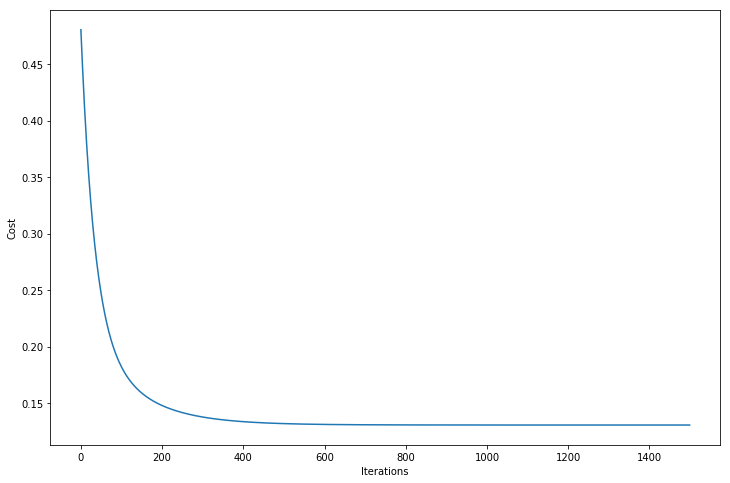

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost');

### Selecting learning rates

In [24]:
alphas = [0.3, 0.1, 0.03, 0.01, 0.003]
iters = 1000
alpha_dict = {}

for alpha in alphas:
    theta = np.zeros((X.shape[1],1))
    theta, cost = gradientDescent(X, y, theta, alpha, iters)
    alpha_dict[alpha] = cost

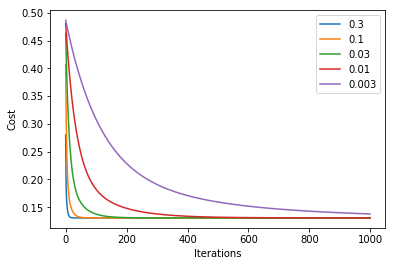

In [25]:
for alpha in alphas:
    plt.plot(np.arange(iters), alpha_dict[alpha], label=alpha)
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend();

### Normal Equations

In the lecture videos, you learned that the closed-form solution to linear
regression is;

$$\theta = (X^TX)^-1X^Ty$$

Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no "loop until convergence" like
in gradient descent.

In [26]:
data2 = pd.read_csv('data/ex1data2.txt',
                    header=None, names=['size', 'bedrooms', 'price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [27]:
data2.insert(0, 'intercept', 1)
X = data2.as_matrix(columns = ['intercept', 'size', 'bedrooms'])
y = data2.as_matrix(['price'])

In [28]:
def normaleq(X, y):
    first = np.linalg.inv(X.T.dot(X))
    second = X.T.dot(y)
    return first.dot(second)

In [29]:
norm_theta = normaleq(X,y)

In [30]:
norm_pred = norm_theta[0] + norm_theta[1]*1650 + norm_theta[2]*3

In [31]:
norm_pred

array([293081.4643349])

### Alternative to Scratch (Scikit-Learn)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
data = pd.read_csv('data/ex1data1.txt', 
                   header=None, names=['population', 'profit'])

In [34]:
X = data['population'].values.reshape(-1,1)
y = data['profit']

In [35]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y);

Here's what the scikit-learn model's predictions look like.

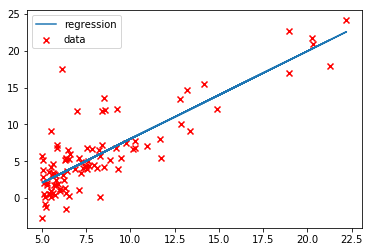

In [36]:
y_pred = lr.predict(X)

plt.scatter(X, y, marker = 'x', c='red', label='data')
plt.plot(X, y_pred, label='regression')
plt.legend();